In [213]:
import numpy as np
import pandas as pd
import scipy
from copy import deepcopy

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

### K-means

In [230]:
def init_centroids(data, n):
    indeces = np.random.randint(0,data.shape[0], size=n)
    #print(indeces)
    return data[indeces]

def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def find_nearest_centroid(point, centroids):
    min_k = 0
    for k in range(1,centroids.shape[0]):
        if distance(point, centroids[k]) < distance(point,
                                                    centroids[min_k]):
            min_k = k
    return min_k

def recalculate_centroid(cluster):
    return cluster.mean(axis=0)


def K_means_clustering(data, n_clusters=3, min_centroids_dist=1e-10,
                       max_iter=1e4):
    #plot_2f_dataset(data)
    
    centroids_dist = np.inf
    centroids = init_centroids(data, n_clusters)
    labels = []
    for point in data:
        labels.append(find_nearest_centroid(point, centroids))
    #plot_2f_dataset(data, labels)
    
    iter_num = 0
    while centroids_dist > min_centroids_dist and iter_num < max_iter:
        old_centroids = deepcopy(centroids)
        k = 0
        for label in set(labels):
            cluster = np.array([data[ind]
                                for ind in range(len(labels))
                                if labels[ind] == label])
            centroids[k] = recalculate_centroid(cluster)
            k += 1
        
        labels = []
        for point in data:
            labels.append(find_nearest_centroid(point, centroids))
        centroids_dist = max([distance(centroids[k], old_centroids[k]) 
                              for k in range(centroids.shape[0])])
        
        #print(centroids_dist)
        #plot_2f_dataset(data, labels)
        iter_num += 1
    return labels

#  Visualizing algorithms results

In [144]:
def plot_2f_dataset(data, labels=None, colors=None): 
    from numpy.random import rand
    data = np.array(data)
    if labels == None:
        labels = np.zeros(data.shape[0])
    else:
        labels = np.array(labels)
    n = len(set(labels))
    if(colors == None):
        colors = ListedColormap([tuple(rand(3)) for i in range(n)])
    pyplot.figure(figsize(5, 5))
    pyplot.scatter(data[:,0], data[:,1], c = labels, cmap = colors)
    plt.show()

In [90]:
def print_result(coef, true, predict, cut = 5):
    print('w:\n',coef,'\n')
    print('true vs. prediction:\n',vstack((true,predict)).T[:cut],'\n...\n')
    print('accuracy: ',round(accuracy(true, predict),3))

In [91]:
def plot_for_one_feature(train_data, train_labels, w, title):
    n = 100
    x = np.linspace(train_data.min(), train_data.max(), n).reshape((n,1))
    plt.figure(figsize = (8,5))
    plt.plot(train_data, train_labels, 'o', markersize = 5)
    plt.plot(x, sigmoid(prediction(w, x)), '-', linewidth = 2)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.title(title)
    plt.show()

In [92]:
def plot_for_two_feature(data, labels, w, title, mean_std = True):
    plot_2d_dataset_class([data, labels])
    if mean_std:
        mean = data.mean(axis = 0)[0]
        std = data.std(axis = 0)[0]
        x = np.linspace(mean - std, mean + std, 2).reshape((2,1))
    else:    
        x = np.linspace(data.min(axis = 0)[0], data.max(axis = 0)[0], 2).reshape((2,1))
    y = - w[0] / w[2] - w[1] / w[2] * x
    plt.plot(x, y, '-', linewidth = 4)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(title)
    plt.show()

# Data

### Generate / Import dataset

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  after removing the cwd from sys.path.


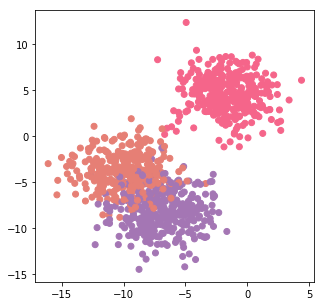

In [232]:
from sklearn import datasets
sample_size = 200
data, target = datasets.make_blobs(n_samples=1000, n_features=2, centers=3,
                                   cluster_std=2.0, center_box=(-10.0, 10.0),
                                   shuffle=True, random_state=1)
if data.shape[1] == 2:
    plot_2f_dataset(data, target)

# Run models and output

### K-means

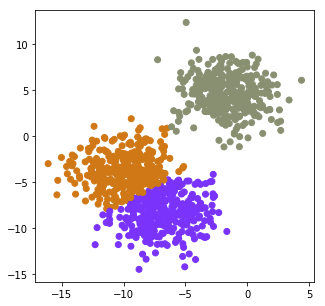

In [233]:
labels = K_means_clustering(data,n_clusters=3)
if data.shape[1] == 2:
    plot_2f_dataset(data, labels)

### sklearn.cluster.KMeans for check

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  after removing the cwd from sys.path.


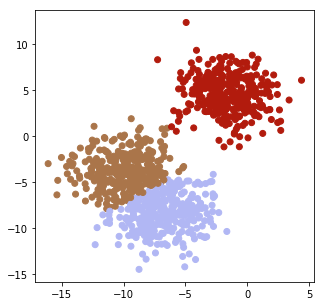

In [235]:
from sklearn import cluster

K_means_clustering = cluster.KMeans(n_clusters=3, random_state=None)
K_means_clustering.fit(data)
if data.shape[1] == 2:
    plot_2f_dataset(data, K_means_clustering.labels_)